# SLIDING WINDOW ALGORITHM
The sliding window is a technique for reducing the time complexity of problems that involve checking all contigous subarrays (or substrings) of a fixed or variable size. 

Instead of computing things over and over again in a nested loop (which is slow), we can use a window that slides over the data just once- keeping track of what is inside it. 

 When to Use Sliding Window

Use it when you're:

- Working with arrays or strings

- Looking for maximum/minimum/average in subarrays

- Solving for longest/shortest substrings with certain conditions

- Finding elements that meet a condition in contiguous chunks

## FIXED SIZE SLIDING WINDOW QUESTIONS 

## 643 Maximum Average SubArray

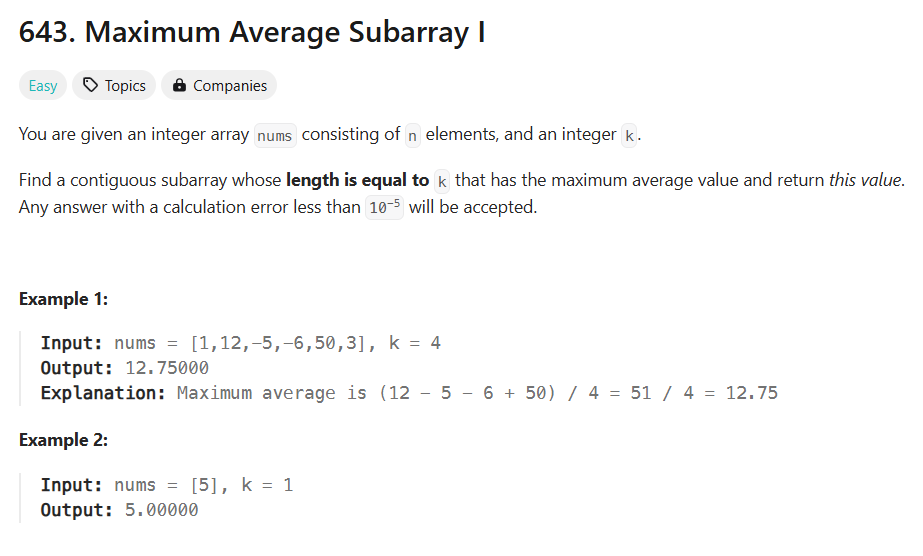

In [6]:
def findMaxAverage(nums,k):
    

    # Sum of first k elements
    curr_sum = sum(nums[:k])
    max_avg = curr_sum / float(k)

    # Sliding window
    for i in range(k, len(nums)):
        curr_sum += nums[i] - nums[i - k]
        max_avg = max(max_avg, curr_sum / float(k))

    return max_avg

findMaxAverage([1,12,-5,-6,50,3], k = 4)


12.75

## 1456 Maximum Number of Vowels in  a Substring of Given Length
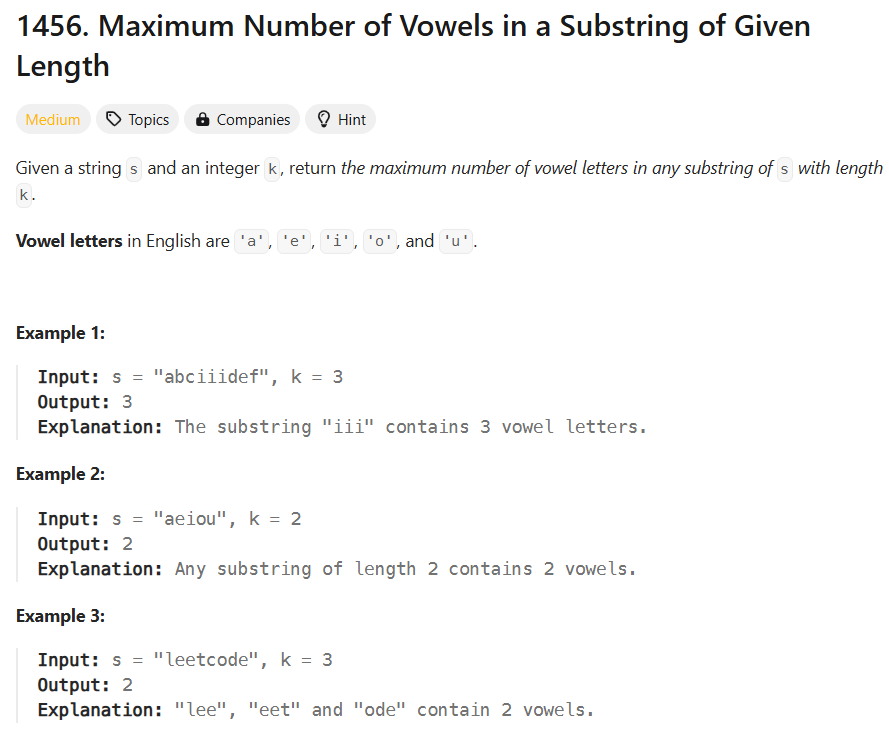

In [7]:
def maxVowels(s,k):
    vowel={'a','e','i','o','u'}

    l,cnt,res = 0,0,0
    for r in range(len(s)):
        cnt +=1 if s[r] in vowel else 0

        if r-l+1>k:
            cnt -=1 if s[l] in vowel else 0
            l +=1


        res = max(res,cnt)

    return res


maxVowels("abciiidef", k = 3)

    

3

## 1695 Maximum Erasure Value
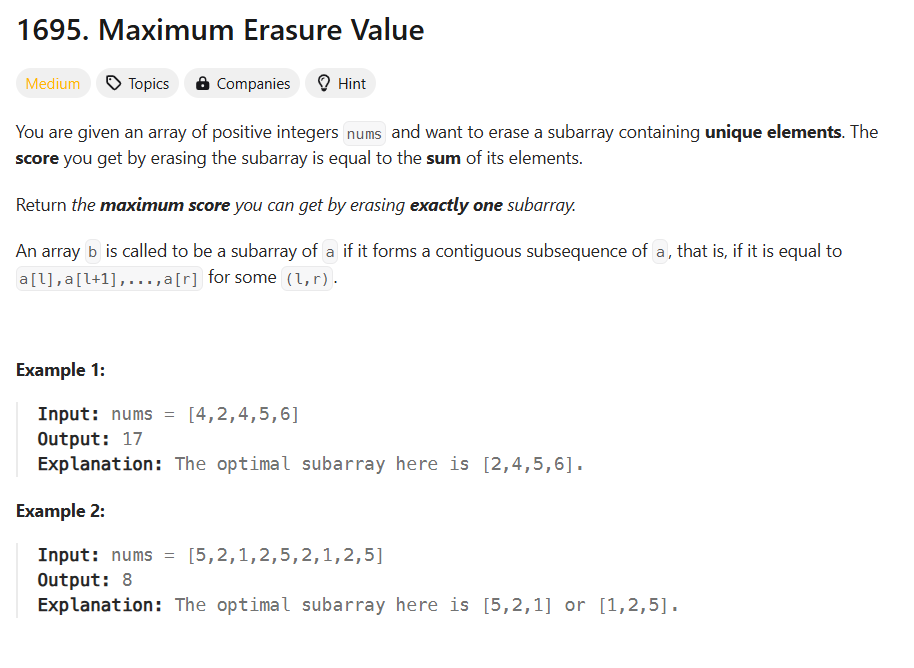

In [10]:
def maximumUniqueSubarray(nums):
    seen = set()
    left = 0
    current_sum = 0
    max_sum = 0

    for right in range(len(nums)):
        while nums[right] in seen:
            seen.remove(nums[left])
            current_sum -= nums[left]
            left += 1
        seen.add(nums[right])
        current_sum += nums[right]
        max_sum = max(max_sum, current_sum)

    return max_sum


maximumUniqueSubarray([4,2,4,5,6])

17

# VARIABLE SIZE SLIDING WINDOW

## Minimum Window Substring

In [3]:
def minWindow(s,t):
    if t =="": return ""

    countT, window = {},{}

    for c in t:
        countT[c] = countT.get(c,0)
 
    have, need = 0, len(countT)
    res,resLen = [-1,-1], float("infinity")
    l=0

    for r in range (len(s)):
        c = s[r]
        window[c] = 1 + window.get(c,0)

        if c in countT and window [c]==countT[c]:
            have +=1

        while have == need:
            # update our result
            if (r-l+1)< resLen:
                res = [l,r]
                resLen = (r-l+1)
            # pop from the left of our window
            window[s[l]] -= 1

            if s[l] in countT and window[s[l]] < countT[s[l]]:
                have -= 1
            l += 1
    l,r = res
    return s[l:r+1] if resLen != float('infinity') else ""


# Example
minWindow(s = "ADOBECODEBANC", t = "ABC")


''